# Purpose
The purpose of this notebook is to provide a resource to learn bayesian regression, and a starter on Gaussian Process/Kriging. 

In [2]:
%matplotlib notebook
import bayesdemo

# Linear Basis Function
Given the linear model <br />
$y(\pmb{x},\pmb{w})=w_0+w_1 x_1 +... w_D x_D$ <br />

This model can be extended using basis functions denoted by $\phi_j(\pmb{x})$ such that...
<p/>
$y(\pmb{x},\pmb{w})=\sum_{j=0}^{M-1} w_j \phi_j(\pmb{x}) = \pmb{w}^T \pmb{\phi}(\pmb{x})$
<p>

Where $j$ refers to a specific basis function in $M$ total basis functions. There are $M$ weights, $\pmb{w}$. The output $y$ is scalar and $\pmb{x}$ is the input vector. 

<br /> 
For a set of $N$ data points, it is convenient to define the design matrix, $\pmb{\Phi}$ as $\Phi_{nj}=\phi_j(\pmb{x}_n)$ , where $n$ refers to a data point in a dataset $\{\pmb{X}\}$. The model for the dataset is shown below as.
<br />
$\pmb{y}(\pmb{X},\pmb{w})=\pmb{\Phi}\pmb{w}$

In the first case of linear regression our Design matrix has its first column populated by 1s, and the second column populated by the input points of interest $\pmb{x}=x_1,x_2,..,x_N$ where each element has a singular dimension.

# Bayes Theorem

<p/><p>
If we want to build a model, $M$, from data we have obtained, refered to as $D$, we can do this is in a bayesian approach. <br />  

From the product rule we know $p(M|D)p(D)=p(D|M)p(M)$ and from the rule of sums we know $p(D)=\sum_M p(D|M)p(M)$ . Combining this knowledge we find bayes theorem. 
<p/>
$p(M|D)=\frac{p(D|M)p(M)}{p(D)=\sum_M p(D|M)p(M)}$
<p>

The use of bayesian inference involves the below formulation
<p/>
$p(M|D) \propto p(D|M)p(M)$
<p>
Or for some
<p/>
$posterior \propto likelihood * prior$
<p>

Which is called a likelihood since the right hand ride is unnormalized. This equation allows us to sample from the posterior to obersve the likelihood of a given model, relative to other possible models and make a selection of models. This is the problem in bayesian regression, given some data $D$ what is the best model $M$.

# Bayes Theorem for Gaussian variable
We will be using nonlinear basis functions a well as working with Gaussian distributions. It is therefore helpful to point out for reference...
<br />  
### For gaussian distribution p(x), p(y|x)
That is, if $p(x,y)=p(x)p(y|x)=\mathcal{N}$, is a gaussian distribution...

Given conditional and marginal of y|x and x... that is (y is a function of x):
<p/>
$p(x)=\mathcal{N}(\pmb{x}|\pmb{\mu},\pmb{\Lambda}^{-1})$ 
<br />
$p(y|x)=\mathcal{N}(\pmb{y}|\pmb{A}\pmb{x}+\pmb{b},\pmb{L}^{-1})$
<p>

Marginal of y and conditional of x|y:
<p/>
$p(y)=\mathcal{N}(\pmb{y}|\pmb{A}\pmb{\mu}+\pmb{b},\pmb{L}^{-1}+\pmb{A}|\pmb{\Lambda}^{-1}\pmb{A}^T)$ <br />
$p(x|y)=\mathcal{N}(\pmb{x}|\Sigma\{\pmb{A}^{T}\pmb{L}(\pmb{y}-\pmb{b})+\pmb{\Lambda}\pmb{\mu}\},\pmb{\Sigma})$
<p>
$\Sigma=(\pmb{\Lambda}+\pmb{A}^{T}\pmb{L}\pmb{A})^{-1}$

<br />  
*Note that $\pmb{b}$ is $\pmb{0}$ for the following demonstrations


# Linear Bayesian regression
We will go through an example for predicting the weights for a linear model of the form
<p/>
$t=w_0+w_1 x$
<p>
Where we are finding the weights given a synthetically generated dataset. The synthetically generated set has weights $w_0=-0.3$, $w_1=0.5$.
 

## Regression

Given the regressive model.

$t=y(\pmb{x},\pmb{w})+\epsilon$

Where $t$ are observed values, $y(\pmb{x},\pmb{w})$ is a deterministic function where $\pmb{w}$ are the weights and $\pmb{x}$ are the inputs. If we assume the noise, $\epsilon$ is additive gaussian noise than the target distribution is.

$p(t|\pmb{x},\pmb{w},\beta^{-1})=\mathcal{N}(t|y(\pmb{x},\pmb{w}),\beta^{-1})$

Where $\mathcal{N}$ is a gaussian with mean $y(\pmb{x},\pmb{w})$ and precision (inverse of variance) $\beta$. The likelihood of a target dataset, $\pmb{t}= t_1, t_2 ... t_N$ given a model is shown below.

$p(\pmb{t}|\pmb{w},\beta)=\prod_{n=1}^{N} \mathcal{N}(t_n|\pmb{w}^T \pmb{\phi}(\pmb{x}_n),\beta^{-1}) = \mathcal{N}(\pmb{t}|\pmb{\Phi}\pmb{w},\beta^{-1} \pmb{I})$

For a posterior distribution over the weights we can write <br />
$p(\pmb{w}|\pmb{t})\propto p(\pmb{t}|\pmb{w},\beta)p(\pmb{w})$
<br />  

The prior $p(\pmb{w})$ is a gaussian conjugate prior due to $p(\pmb{t}|\pmb{w})$ with the following distribution <br />
$p(\pmb{w})=\mathcal{N}(\pmb{w}|\pmb{m}_0,\pmb{S}_0)$

The posterior is therefore also gaussian due to the choice of a gaussian prior with the form <br /> 
$p(\pmb{w}|\pmb{t})=\mathcal{N}(\pmb{w}|\pmb{m}_N,\pmb{S}_N)$

Since we have a gaussian likelihood and prior we can use Bayes theorem for Gaussian variables from the section above and set <br />
$\pmb{\Lambda}=\pmb{S}_0$ <br />
$\pmb{A}=\pmb{\Phi}$ <br />
$\pmb{L}=\beta \pmb{I}$ <br />
$\pmb{y}=\pmb{t}$ <br />

we can than find <br /> 
$\pmb{m_N}=\pmb{S}_N(\pmb{S}_0^{-1}\pmb{m_0}+\beta\pmb{\Phi}^T\pmb{t})$ <br \> 
$\pmb{S}_N^{-1}=\pmb{S}_0^{-1}+\beta\pmb{\Phi}^T\pmb{\Phi}$

Using this information we can sample from the posterior for different weights.  <br />

In this example we manually set $\beta$ and $\alpha$ and can observe how changing the number of datapoints n, affects the fits. In the next example we will tune these parameters. 

In [3]:
##Below Are the inputs to the demo

## Model Parameters
n=20 #number of datapoints to include from true function
alpha=2 #parameter 1
beta=25 #parameter 2

## Graph Parameters
m=1000 #number of samples from the posterior to build histogram
fits=10 #number of fits to display on graph (randomly selected)

<IPython.core.display.Javascript object>


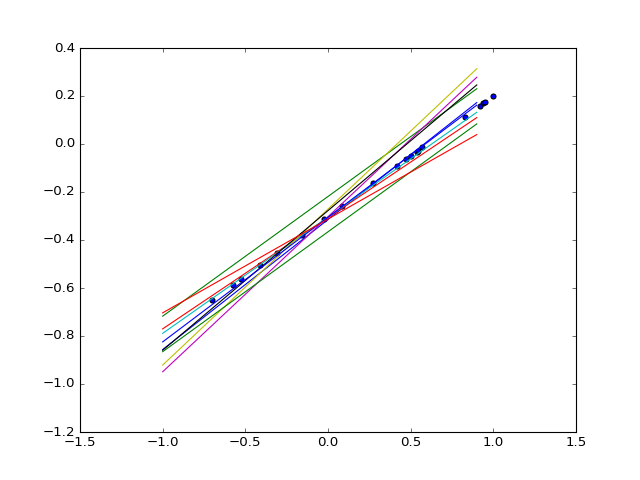

<IPython.core.display.Javascript object>


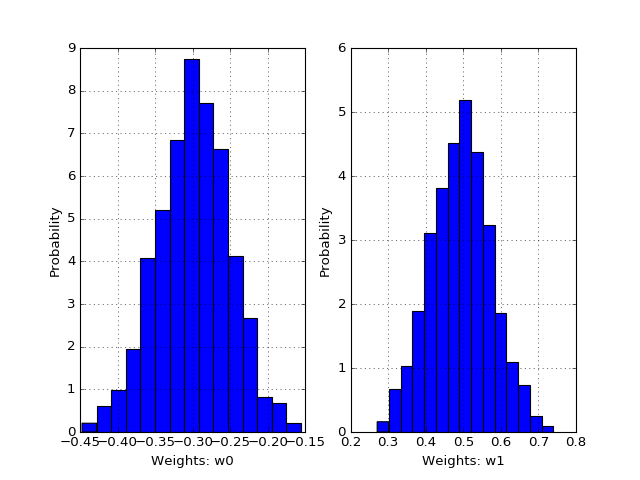

(<matplotlib.figure.Figure at 0x1061dcc50>,
 <matplotlib.figure.Figure at 0x10f144790>)

In [4]:
bayesdemo.demo_bayes_linear(n=n,m=m,fits=fits)

## Viewing Results
We now see that by sampling the posterior of the weights we can get a range of weights and find those with the highest probability to use in the model. Recall out set parameters were w0=-0.3 and w1=0.5. In the next step we will perform regression and tune hyperparameters in order to achieve a fit.

# Nonlinear Bayesian Regression
Above if we change the number of points the fit changes. For now we arbitrarily decided the parameters for the linear model. We will now apply the bayesian paradigm using non-linear basis functions. We will than learn the parameters in order to maximize the likelihood of our training set. We will do this for a simple sin function of the form below.
<p/>
$t = sin(2 \pi x)$
<p>

Where $x [-1,1]$

## Now we adopt a new basis function
For this model we decide to use a "Gaussian Basis Function" given by <br />
$\phi_j(x)=exp\{-\frac{(x-\mu_j)^2}{2s^2}\}$

Where $\mu_j$ are the locations of the basis functions in input space. In this example we chose $M=9$ evenly spaced locations across the input space. Therefore the dimensions of $\pmb{\Phi}$ are $N$ by $M$. Where $N$ is the number of training points and $M$ is the number of basis functions 

## Bayes Again...
In this problem we sample $N$ data points randomly from the sinusoidal function above. This set of data points is refered to as $\pmb{t}$.

We simplify our prior assuming a zero mean isotropic gaussian. <br \>
$p(\pmb{w}|\alpha)=\mathcal{N}(\pmb{w}|\pmb{0},\alpha^{-1}\pmb{I})$
<br \>
Where we have $M$ weights, and $\alpha^{-1} \pmb{I}$ is $M$ by $M$

And again applying bayes theorem to gaussian variables on the posterior. <br />
$p(\pmb{w}|\pmb{t},\beta,\alpha) \propto p(\pmb{t}|\pmb{w},\beta) p(\pmb{w}|\alpha)$

Where<br />
$p(\pmb{t}|\pmb{w},\beta)=\prod_{n=1}^{N} \mathcal{N}(t_n|\pmb{w}^T \pmb{\phi}(\pmb{x}_n),\beta^{-1}) = \mathcal{N}(\pmb{t}|\pmb{\Phi}\pmb{w},\beta^{-1} \pmb{I})$

We will find <br /> 
$\pmb{m}_N = \beta \pmb{S}_N \pmb{\Phi}^T\pmb{t}$ <br \>
$\pmb{S}_N^{-1} = \alpha \pmb{I} + \beta \pmb{\Phi}^T \pmb{\Phi}$

Which we again use to sample from the posterior <br />
$p(\pmb{w}|\alpha)=\mathcal{N}(\pmb{w}|\pmb{m}_N,\pmb{S}_N)$ <br />  

We can draw outputs from the sampled weights using <br />
$y(\pmb{x},\pmb{w})=\sum_{j=0}^{M-1} w_j \phi_j(\pmb{x}) = \pmb{w}^T \pmb{\phi}(\pmb{x})$
<br />
Where M=9 in this case

If we wish to sample directly from the predictive distribution we have
$p(\pmb{t}_{N+1}|\pmb{t},\alpha,\beta)=\int p(t|\pmb{w},\beta)p(\pmb{w}|\pmb{t},\alpha,\beta)d\pmb{w}$

Which we can solve again using bayes' theorem for gaussian variables.

In [5]:
##Below Are the inputs to the polynomial

## Model Parameters
alpha=3      #initial guess for alpha parameter
beta=10      #initial guess for beta parameter
s=0.15       #basis function length scale
n=10         #number of training datapoints to include initially
Nbasis=9     #number of basis functions to choose

## Graph Options
m=1000       #number of times to sample posterior to build mean function
fits=20      #number of fits to plot on figure
itermax=50   #choose iteration steps

## Initialization
xtrain=None  #chosen training data (randomly initialized if None)

# Evidence for Parameters
This problem differentiates itself from the previous problem by learning the optimal parameters for the defined basis function. There still needs to be a model selection, i.e., for different basis functions, however we will focus on optimizing $\alpha$ and $\beta$. <br />  

We do this by setting up <br />
$p(\alpha,\beta|\pmb{t})\propto p(\pmb{t}|\alpha,\beta)p(\alpha,\beta)$

From this formulation, we need to maximize $p(\pmb{t}|\alpha,\beta)$ in order to retrieve the most probable parameters. This is written as 

$p(\pmb{t}|\alpha,\beta)=\int p(\pmb{t}|\pmb{w},\beta) p(\pmb{w}|\alpha)d\pmb{w}$
<br />

$p(\pmb{t}|\alpha,\beta)=(\frac{\beta}{2\pi})^{N/2}(\frac{\alpha}{2\pi})^{M/2}\int exp\{-E(\pmb{w})\}d\pmb{w}$ <br />  

$E(\pmb{w})=\frac{\beta}{2} ||\pmb{t}-\pmb{\Phi}\pmb{w}||^2+\frac{\alpha}{2}\pmb{w}^T\pmb{w}$

And is solved analytically by taking $\frac{dp(ln(\pmb{t}|\alpha,\beta))}{d\theta_i}=0$, where $\pmb{\theta} = \{\alpha,\beta\}$

In [6]:
import imp
imp.reload(bayesdemo)

<module 'bayesdemo' from 'bayesdemo.pyc'>

<IPython.core.display.Javascript object>


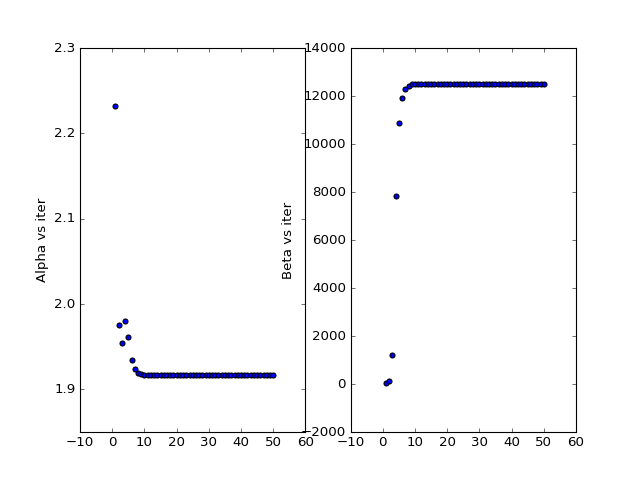

<IPython.core.display.Javascript object>


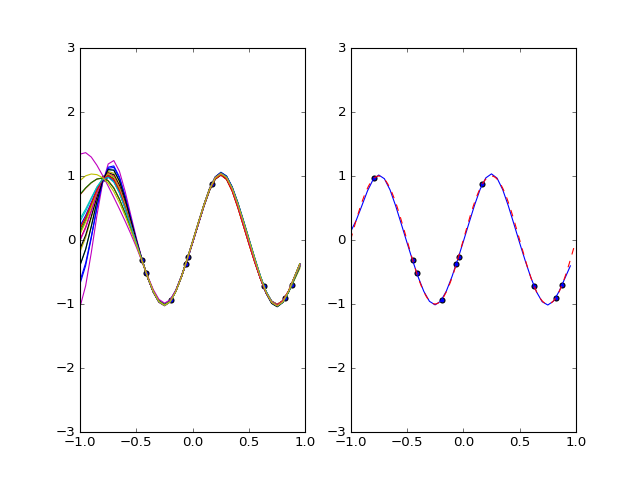

In [7]:
xtrain,alpha,beta=bayesdemo.gaussian_basis(s=s,n=n,fits=fits,alpha=alpha,
                                          beta=beta,itermax=itermax,Nbasis=Nbasis,plothist=False,xtrain=xtrain)

# Gaussian Processes
Gaussian process can be seen as Bayesian Regression with "possibly infinite" basis functions. What the difference comes down to is the useage of basis functions. In the case of GPs, a kernel is used, which is defined by N basis functions. Therefore, our design Matrix is N by N. Put naiively, the locations of the gaussian basis functions $\pmb{\mu_j}$ are the training points themselves $\pmb{\mu}_j=\pmb{x}_1,\pmb{x}_2,\pmb{x}_3 \ldots \pmb{x}_N$ .  This saves us from defining the number of basis functions to use,and where to place them. We can use the evidence function above to compute the necessary parameters $\alpha$ and $\beta$. We can therefore minimize the error between a test set of data, and our model to determine an appropriate basis function hyper parameter $s$. Various optimization algorithms can be used to do such. In this case, test data is data that has been split from the original dataset and is used solely for this purpose. A small validation set is also taken from the training data to ensure the model found after optimizing $s$ is found.

<br  />

## Recap
Gaussian process input vector $\pmb{x}=\pmb{x}_1,\pmb{x}_2 \ldots \pmb{x}_N$ and observed outputs $\pmb{t}=t_1,t_2, \ldots, t_N$ are split into three sections, training, testing and validation sets. The training sets are used for the maximizing the likelihood of $\alpha$ and $\beta$ while the testing set is used for the optimization of the hyperparamter $s$.   



# Sources
Bishop C.M. ,	
Pattern Recognition and Machine Learning (Information Science and Statistics), Springer-Verlag New York, Inc. Secaucus, NJ, USA ©2006